### 1. Business Understanding
### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

### Draw the inferences from the clusters obtained.

### 1. Import libraries required

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

### 2.Load dataset

In [2]:
airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data') 
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline.shape

(3999, 12)

In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
# Column rename.

airline1= airline.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [8]:
airline1.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

### 3. Hierarchical clustering

In [9]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [38]:
# Normalized data frame (considering the numerical part of data)
airline1_norm = norm_func(airline1.iloc[:,1:])
airline1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.333333
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.333333
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.333333
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.333333
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.666667
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.666667
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.666667
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.666667


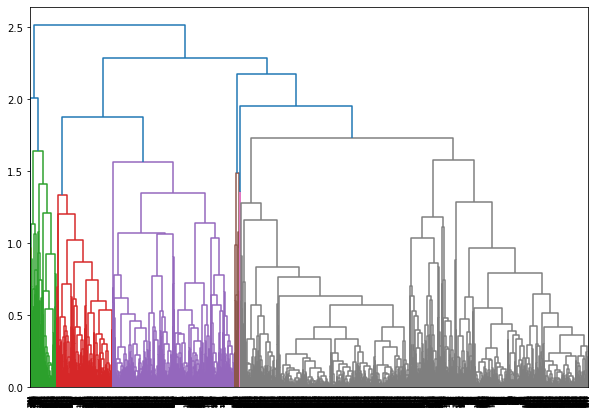

In [39]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline1_norm,'complete'))

In [44]:
# Create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [45]:
# Save clusters for chart

y_hc = hc.fit_predict(airline1_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [50]:
clusters = pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [47]:
airline1_norm['h_clusterid'] = hc.labels_
airline1_norm.mean()

Balance              0.043172
Qual_miles           0.012927
cc1_miles            0.264879
cc2_miles            0.007252
cc3_miles            0.003063
Bonus_miles          0.065020
Bonus_trans          0.134906
Flight_miles_12mo    0.014929
Flight_trans_12      0.025917
Days_since_enroll    0.496330
Award                0.370343
k_clusterid          0.615237
h_clusterid          0.630158
dtype: float64

In [54]:
airlines1 = pd.concat([airline1,clusters],axis=1)
airlines1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusterid,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [62]:
airlines1.iloc[:,0:12].groupby(airlines1.clusters).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,,
0,1744.838514,97112.845946,240.358784,2.662838,1.015541,1.018243,28789.389865,15.789865,857.660135,2.599324,4626.866216,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0


<AxesSubplot:xlabel='clusters', ylabel='count'>

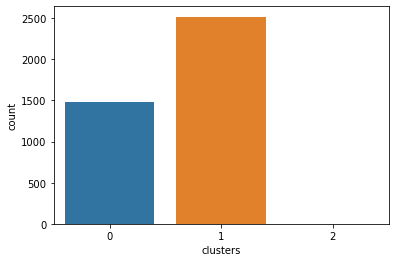

In [57]:
sns.countplot(airlines1["clusters"])

### 4.K-Means

In [63]:
# Standardized function
#scaler = StandardScaler()
#scaled_airlines = scaler.fit_transform(airline1)
#scaled_airlines

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.00535566e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.00535566e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.00535566e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.83413495e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.83413495e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.83413495e-01]])

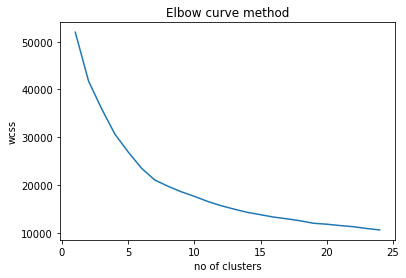

In [64]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range (1,25):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_airlines)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,25), wcss)
plt.title("Elbow curve method")
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
# Build cluster algorithm using K = 4
airline2 = KMeans(4, random_state = 30)
airline2.fit(scaled_airlines)

KMeans(n_clusters=4, random_state=30)

In [19]:
airline2.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [20]:
# Assign clusters to the dataset
airline1['k_clusterid'] = airline2.labels_
airline1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [21]:
# These are standardized values
airline2.cluster_centers_

array([[-0.21937913,  1.19293893,  0.85463972,  0.1048172 ,  0.16062214,
        -0.06276658,  0.63532192,  1.6738428 ,  3.59883523,  3.90180833,
         0.26628629,  0.93459683],
       [-0.79159289, -0.16435061, -0.04825387, -0.50585756,  0.02680935,
        -0.05882618, -0.46590113, -0.37645782, -0.16543415, -0.17638578,
         0.77091404, -0.23965222],
       [ 0.96477511, -0.33302824, -0.05337351, -0.48091901,  0.01574764,
        -0.06276658, -0.44560585, -0.38567835, -0.18294754, -0.20243324,
        -0.95144756, -0.32058346],
       [-0.42834932,  0.54252058,  0.01104681,  1.38834343, -0.08465391,
         0.18385431,  1.19798091,  0.82494974, -0.06750129, -0.07073525,
         0.42727309,  0.66210394]])

In [22]:
airline1.groupby('k_clusterid').agg(['mean']).reset_index()
airline1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


<AxesSubplot:xlabel='k_clusterid', ylabel='count'>

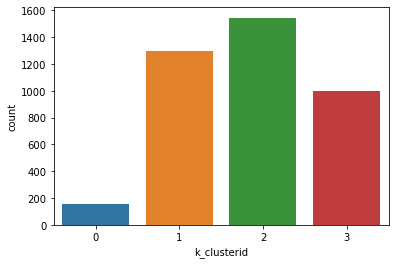

In [67]:
sns.countplot(airline1['k_clusterid'])

### 5.DBSCAN

In [25]:
airlines_new = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airlines_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
airlines_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [27]:
array = airlines_new.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [28]:
scaler = StandardScaler()
scaled_airlines_new = scaler.fit_transform(array)
scaled_airlines_new

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [29]:
dbscan = DBSCAN(eps = 3, min_samples = 11)
dbscan.fit(scaled_airlines_new)

DBSCAN(eps=3, min_samples=11)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [32]:
data = pd.concat([airlines_new,cl],axis =1)
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
data.iloc[:, 1:12].groupby(data.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,290363.744681,1923.138298,2.776596,1.074468,1.521277,60780.712766,28.404255,4425.425532,12.553191,5026.691489,0.819149
0,68662.407810,102.285751,2.051720,1.000000,1.000000,16125.880528,11.157486,365.651151,1.107060,4099.119472,0.359969
1,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000
2,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692


<AxesSubplot:xlabel='cluster', ylabel='count'>

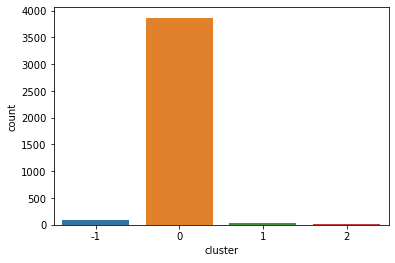

In [34]:
sns.countplot(data['cluster'])

In [17]:
#conclusion: Here,we can conclude that DBSCAN is best clustering method for obtaining clusters.